In [184]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [185]:
# Reading the csv file
df0 = pd.read_csv('data/augmented_class0.csv')  
df1 = pd.read_csv('data/augmented_class1.csv')
dfc = pd.read_csv('data/covid_19_compounds.csv')


In [186]:
df0.head()

,Name,Smile,Class,PUBCHEM_CIDs,Most_Relevant_SMILES,Match_MostRelevant,Matching_SMILES,Matching_CID,Matching_InChIKey
0,propisergide,C[C@H](CO)NC(=O)[C@H]1CN(C)[C@@H]2Cc3cn(C)c4cc...,0,[20055549],C[C@@H](CO)NC(=O)[C@H]1CN([C@@H]2CC3=CN(C4=CC=...,False,NaN,NaN,NaN
1,sancycline,CN(C)[C@H]1[C@@H]2C[C@@H]3Cc4cccc(O)c4C(=O)C3=...,0,[54688686],CN(C)[C@H]1[C@@H]2C[C@@H]3CC4=C(C(=CC=C4)O)C(=...,False,NaN,NaN,NaN
2,metoserpate,CO[C@H]1C[C@@H]2CN3CCc4c([nH]c5cc(OC)ccc45)[C@...,0,[66252],CO[C@H]1C[C@@H]2CN3CCC4=C([C@H]3C[C@@H]2[C@@H]...,True,CO[C@H]1C[C@@H]2CN3CCC4=C([C@H]3C[C@@H]2[C@@H]...,66252.0,FPGCYQVKNKEGRQ-SXLQGMKLSA-N
3,fludiazepam,CN1C(=O)CN=C(c2ccccc2F)c3cc(Cl)ccc13,0,[3369],CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3F,True,CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3F,3369.0,ROYOYTLGDLIGBX-UHFFFAOYSA-N
4,epiestriol,C[C@]12CC[C@H]3[C@H](CCc4cc(O)ccc34)[C@H]1C[C@...,0,[68929],C[C@]12CC[C@H]3[C@H]([C@@H]1C[C@@H]([C@@H]2O)O...,False,NaN,NaN,NaN


In [187]:
df1.head()

,Name,Smile,Class,PUBCHEM_CIDs,Most_Relevant_SMILES,Match_MostRelevant,Matching_SMILES,Matching_CID,Matching_InChIKey
0,Everolimus,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,1,[6442177],C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,True,C[C@@H]1CC[C@H]2C[C@@H](/C(=C/C=C/C=C/[C@H](C[...,6442177.0,HKVAMNSJSFKALM-GKUWKFKPSA-N
1,Posaconazole,CC[C@@H]([C@H](C)O)N1N=CN(C1=O)c2ccc(cc2)N3CCN...,1,[468595],CC[C@@H]([C@H](C)O)N1C(=O)N(C=N1)C2=CC=C(C=C2)...,True,CC[C@@H]([C@H](C)O)N1C(=O)N(C=N1)C2=CC=C(C=C2)...,468595.0,RAGOYPUPXAKGKH-XAKZXMRKSA-N
2,Alatrofloxacin,C[C@H](N)C(=O)N[C@@H](C)C(=O)N[C@H]1[C@@H]2CN(...,1,"[3086677, 5282517]",C[C@@H](C(=O)N[C@@H](C)C(=O)NC1[C@H]2[C@@H]1CN...,False,NaN,NaN,NaN
3,Aminosidine,NC[C@@H]1O[C@H](O[C@H]2[C@@H](O)[C@H](O[C@@H]3...,1,[165580],C1[C@H]([C@@H]([C@H]([C@@H]([C@H]1N)O[C@@H]2[C...,True,C1[C@H]([C@@H]([C@H]([C@@H]([C@H]1N)O[C@@H]2[C...,165580.0,UOZODPSAJZTQNH-LSWIJEOBSA-N
4,Isepamicin,CN[C@@H]1[C@@H](O)[C@@H](O[C@@H]2[C@@H](O)[C@H...,1,[3037209],C[C@@]1(CO[C@@H]([C@@H]([C@H]1NC)O)O[C@H]2[C@@...,True,C[C@@]1(CO[C@@H]([C@@H]([C@H]1NC)O)O[C@H]2[C@@...,3037209.0,UDIIBEDMEYAVNG-ZKFPOVNWSA-N


In [188]:
dfc.head()

,Unnamed: 0,atom_stereo_count,atoms,bond_stereo_count,bonds,cactvs_fingerprint,canonical_smiles,charge,cid,complexity,...,pharmacophore_features_3d,record,rotatable_bond_count,shape_fingerprint_3d,shape_selfoverlap_3d,tpsa,undefined_atom_stereo_count,undefined_bond_stereo_count,volume_3d,xlogp
0,0,6,"[{'aid': 1, 'number': 15, 'element': 'P', 'y':...",0,"[{'aid1': 1, 'aid2': 5, 'order': 1, 'style': 6...",1111000001111011101111000000001000000000000000...,CCC(CC)COC(=O)C(C)NP(=O)(OCC1C(C(C(O1)(C#N)C2=...,0,121304016,1010.0,...,NaN,"{'id': {'id': {'cid': 121304016}}, 'atoms': {'...",14,NaN,NaN,204.0,0,0,NaN,1.9
1,0,1,"[{'aid': 1, 'number': 17, 'element': 'Cl', 'y'...",0,"[{'aid1': 1, 'aid2': 22, 'order': 1}, {'aid1':...",1110000001111011000000000000000000000100000000...,CCN(CC)CCCC(C)NC1=C2C=CC(=CC2=NC=C1)Cl,0,2719,309.0,...,NaN,"{'id': {'id': {'cid': 2719}}, 'atoms': {'aid':...",8,NaN,NaN,28.2,1,0,NaN,4.6
2,0,4,"[{'aid': 1, 'number': 16, 'element': 'S', 'y':...",0,"[{'aid1': 1, 'aid2': 44, 'order': 1, 'style': ...",1111000001111111101110000000000001100000000000...,CC(C)C1=NC(=CS1)CN(C)C(=O)NC(C(C)C)C(=O)NC(CC2...,0,392622,1040.0,...,NaN,"{'id': {'id': {'cid': 392622}}, 'atoms': {'aid...",18,NaN,NaN,202.0,0,0,NaN,6.0
3,0,0,"[{'aid': 1, 'number': 8, 'element': 'O', 'y': ...",0,"[{'aid1': 1, 'aid2': 7, 'order': 1}, {'aid1': ...",1111000001111010001100000000000000000000000000...,CCCCCCCCC1=CC=C(C=C1)CCC(CO)(CO)N,0,107970,258.0,...,NaN,"{'id': {'id': {'cid': 107970}}, 'atoms': {'aid...",12,NaN,NaN,66.5,0,0,NaN,4.2
4,0,4,"[{'aid': 1, 'number': 8, 'element': 'O', 'y': ...",0,"[{'aid1': 1, 'aid2': 12, 'order': 1}, {'aid1':...",1100000001110011001110000000000000000000000000...,C1=CN(C(=O)N=C1NO)C2C(C(C(O2)CO)O)O,0,197020,398.0,...,NaN,"{'id': {'id': {'cid': 197020}}, 'atoms': {'aid...",3,NaN,NaN,135.0,0,0,NaN,-2.2


In [189]:
df0 = df0[["Most_Relevant_SMILES"]]
df1 = df1[['Most_Relevant_SMILES']]
df0 = df0[df0.Most_Relevant_SMILES.notna()]
df1 = df1[df1.Most_Relevant_SMILES.notna()]
dfc = dfc[['isomeric_smiles']]
dfc = dfc[dfc.isomeric_smiles.notna()]

In [190]:
df0['mol']= df0['Most_Relevant_SMILES'].apply(lambda x: AllChem.MolFromSmiles(x))
df0['FP']= df0['mol'].apply(lambda x: Chem.RDKFingerprint(x))
df1['mol']= df1['Most_Relevant_SMILES'].apply(lambda x: AllChem.MolFromSmiles(x))
df1['FP']= df1['mol'].apply(lambda x: Chem.RDKFingerprint(x))
dfc['mol']= dfc['isomeric_smiles'].apply(lambda x: AllChem.MolFromSmiles(x))
dfc['FP']= dfc['mol'].apply(lambda x: Chem.RDKFingerprint(x))


[16:02:42] WARNING: not removing hydrogen atom without neighbors
[16:02:42] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors
[16:02:44] WARNING: not removing hydrogen atom without neighbors


In [191]:
# Transforming Fingerprint objects into 2048-bit arrays
N_features = 2048

N_0 = df0.shape[0]
X_ = np.array(df0['FP'].apply(lambda x: np.array(x, dtype=np.uint8)))
X0 = np.zeros((N_0, N_features), dtype=np.uint8)
for i in range(N_0):
  X0[i, :] = X_[i]
Y0=np.zeros(N_0)

N_1 = df1.shape[0]
X_ = np.array(df1['FP'].apply(lambda x: np.array(x, dtype=np.uint8)))
X1 = np.zeros((N_1, N_features), dtype=np.uint8)
for i in range(N_1):
  X1[i, :] = X_[i]
Y1=np.ones(N_1)

N_1 = dfc.shape[0]
X_ = np.array(dfc['FP'].apply(lambda x: np.array(x, dtype=np.uint8)))
Xc = np.zeros((N_1, N_features), dtype=np.uint8)
for i in range(N_1):
  Xc[i, :] = X_[i]


In [192]:
X = np.concatenate((X0,X1),axis=0)
Y = np.concatenate((Y0,Y1),axis=0)
best_acc = 0.0

SVM

Train accuracy using new SMILES with SVM is 0.854757085020243,test accuracy is 0.7327935222672065


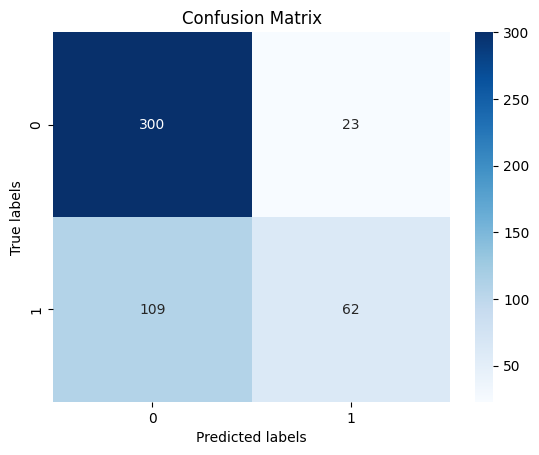

Number of 0.0 in the predicted COVID drugs labels: 1083
Number of 1.0 in the predicted COVID drugs labels: 624


In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = svm.SVC()
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using new SMILES with SVM is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count)

Random Forest

Train accuracy using new SMILES with default RFC is 0.9924089068825911,test accuracy is 0.6923076923076923


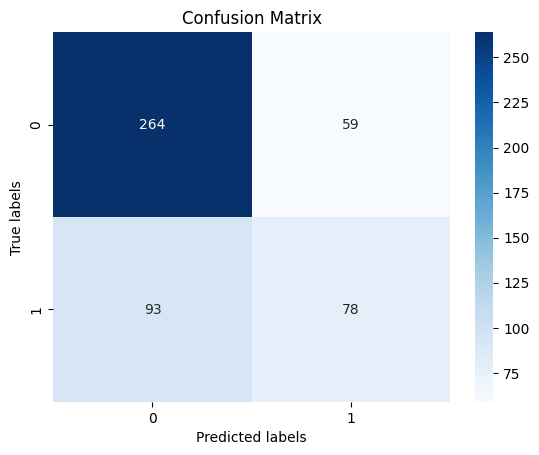

Number of 0.0 in the predicted COVID drugs labels: 1042
Number of 1.0 in the predicted COVID drugs labels: 665


In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using new SMILES with default RFC is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count)

Train accuracy using new SMILES with simpler RFC is 0.8415991902834008,test accuracy is 0.6781376518218624


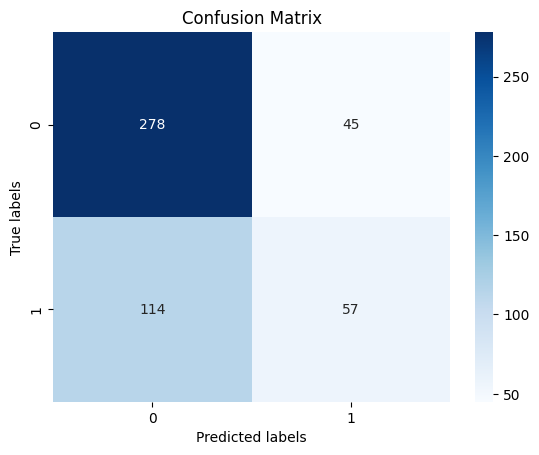

Number of 0.0 in the predicted COVID drugs labels: 1146
Number of 1.0 in the predicted COVID drugs labels: 561


In [195]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=15,max_depth=7)
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using new SMILES with simpler RFC is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count)

Using the original SMILES

In [196]:
# Reading the csv file
df0 = pd.read_csv('data/augmented_class0.csv')  
df1 = pd.read_csv('data/augmented_class1.csv')
df0 = df0[['Smile']]
df1 = df1[['Smile']]
df0 = df0[df0.Smile.notna()]
df1 = df1[df1.Smile.notna()]


In [197]:
df0['mol']= df0['Smile'].apply(lambda x: AllChem.MolFromSmiles(x))
df0['FP']= df0['mol'].apply(lambda x: Chem.RDKFingerprint(x))
df1['mol']= df1['Smile'].apply(lambda x: AllChem.MolFromSmiles(x))
df1['FP']= df1['mol'].apply(lambda x: Chem.RDKFingerprint(x))

[16:03:03] WARNING: not removing hydrogen atom without neighbors
[16:03:03] WARNING: not removing hydrogen atom without neighbors
[16:03:04] WARNING: not removing hydrogen atom without neighbors


In [198]:
# Transforming Fingerprint objects into 2048-bit arrays
N_features = 2048

N_0 = df0.shape[0]
X_ = np.array(df0['FP'].apply(lambda x: np.array(x, dtype=np.uint8)))
X0 = np.zeros((N_0, N_features), dtype=np.uint8)
for i in range(N_0):
  X0[i, :] = X_[i]
Y0=np.zeros(N_0)

N_1 = df1.shape[0]
X_ = np.array(df1['FP'].apply(lambda x: np.array(x, dtype=np.uint8)))
X1 = np.zeros((N_1, N_features), dtype=np.uint8)
for i in range(N_1):
  X1[i, :] = X_[i]
Y1=np.ones(N_1)


In [199]:
X = np.concatenate((X0,X1),axis=0)
Y = np.concatenate((Y0,Y1),axis=0)

Train accuracy using original SMILES with SVM is 0.8522388059701492,test accuracy is 0.7077534791252486


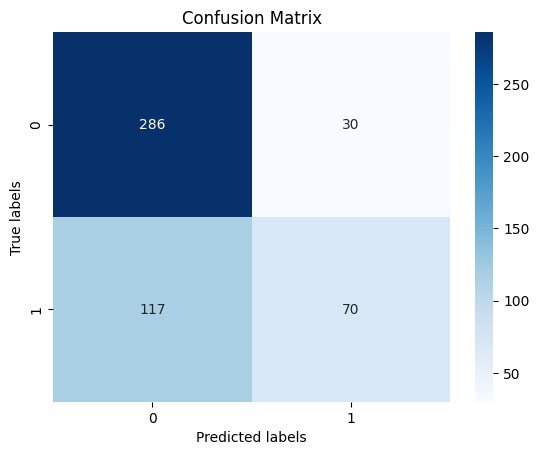

Number of 0.0 in the predicted COVID drugs labels: 1220
Number of 1.0 in the predicted COVID drugs labels: 487


In [200]:
#SVM

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model=svm.SVC()
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using original SMILES with SVM is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count,)


Train accuracy using original SMILES with RFC is 0.9920398009950249,test accuracy is 0.6938369781312127


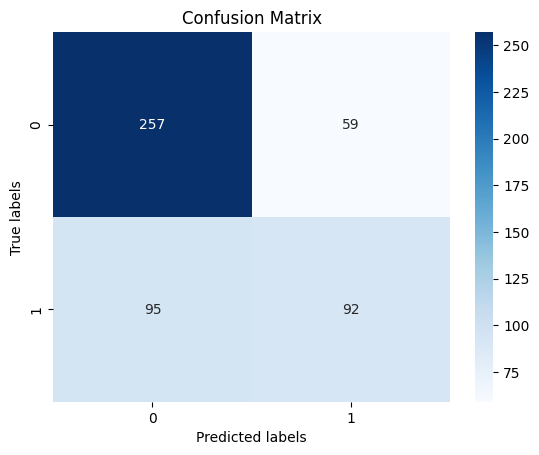

Number of 0.0 in the predicted COVID drugs labels: 1112
Number of 1.0 in the predicted COVID drugs labels: 595


In [201]:
#RFC
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model=RandomForestClassifier()
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using original SMILES with RFC is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count)


Train accuracy using original SMILES with simpler RFC is 0.844776119402985,test accuracy is 0.6918489065606361


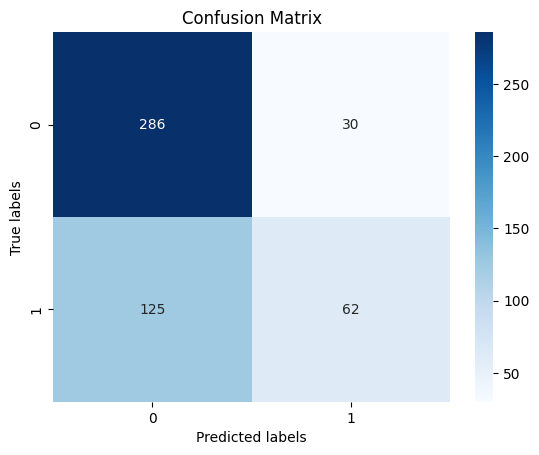

Number of 0.0 in the predicted COVID drugs labels: 1285
Number of 1.0 in the predicted COVID drugs labels: 422


In [202]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=15,max_depth=7)
model.fit(X_train,Y_train)
Y_pred = np.array(model.predict(X_test))
train_pred = np.array(model.predict(X_train))
train_acc = np.mean(train_pred == Y_train)
test_acc = np.mean(Y_pred == Y_test)
print(f'Train accuracy using original SMILES with simpler RFC is {train_acc},test accuracy is {test_acc}')

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

covid_pred = np.array(model.predict(Xc))
if test_acc > best_acc:
    best_pred = covid_pred
unique_values, counts = np.unique(covid_pred, return_counts=True)
# Print the counts
for value, count in zip(unique_values, counts):
    print("Number of", value, "in the predicted COVID drugs labels:", count)

In [204]:
dfc = pd.read_csv('data/covid_19_compounds.csv')
# The prediction is based on new SMILES with SVM
dfc['pred']=best_pred
dfc=dfc[dfc['pred']==1]
dfc.to_csv('data/covid19_pred_positive.csv', index=False)
